In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df_train=pd.read_csv("/Documents/Personnel/Programmation/Python/train.csv")
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [4]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

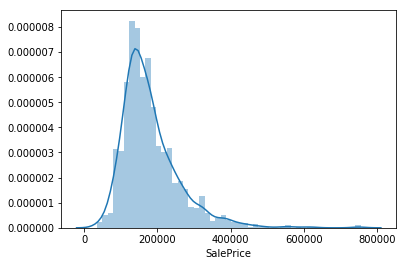

In [5]:
sns.distplot(df_train["SalePrice"])

In [6]:
s=df_train["SalePrice"].skew()
k=df_train["SalePrice"].kurt()
print (s,k)

1.88287575977 6.53628186006


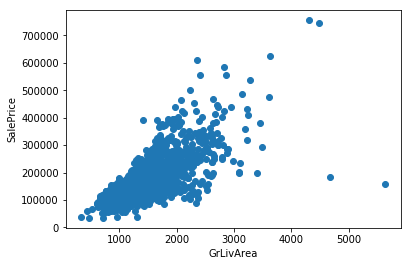

In [7]:
#Relation GrLiveArea et SalePrice
plt.scatter(df_train["GrLivArea"],df_train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

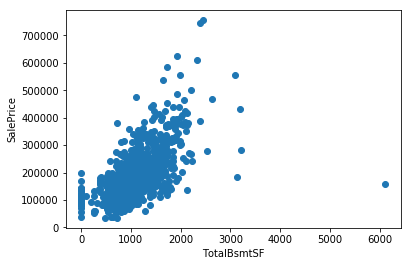

In [8]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")

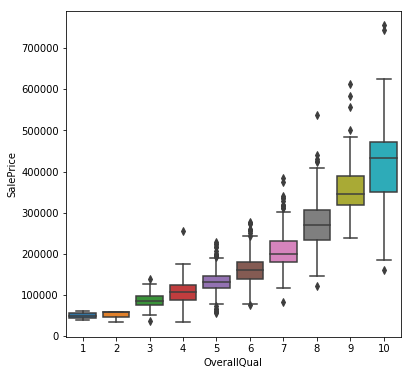

In [9]:
f,ax=plt.subplots(figsize=(6,6))
ax=sns.boxplot(x="OverallQual",y=df_train["SalePrice"],data=df_train)

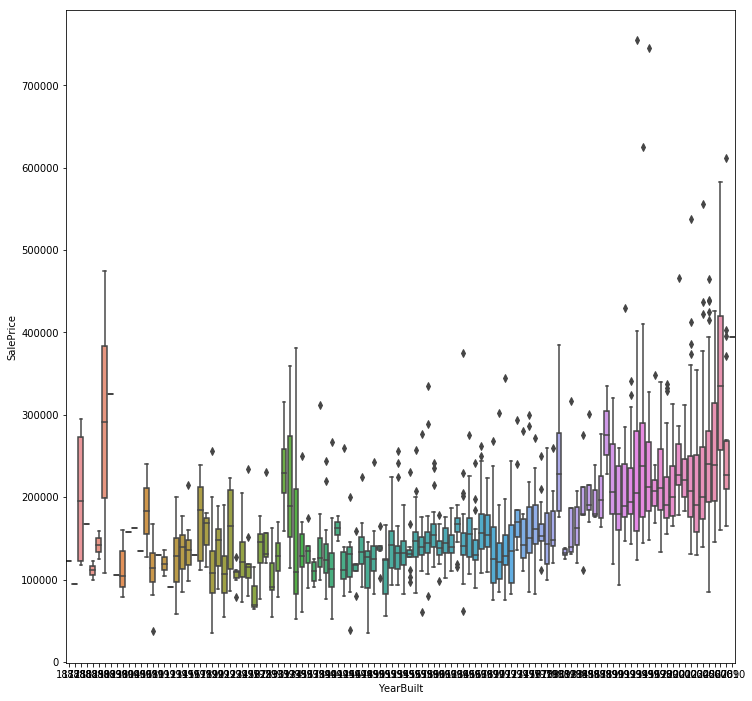

In [10]:
f,ax=plt.subplots(figsize=(12,12))
ax=sns.boxplot(x="YearBuilt",y=df_train["SalePrice"],data=df_train)


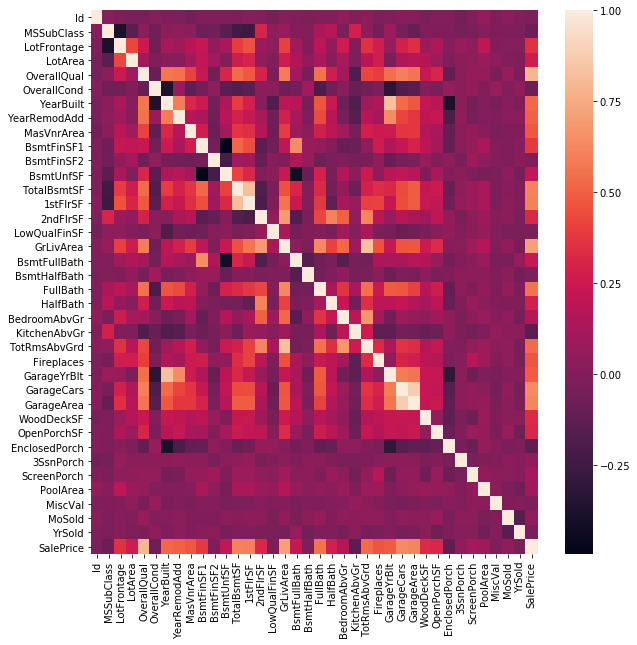

In [11]:
cormat=df_train.corr()
f,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(cormat)

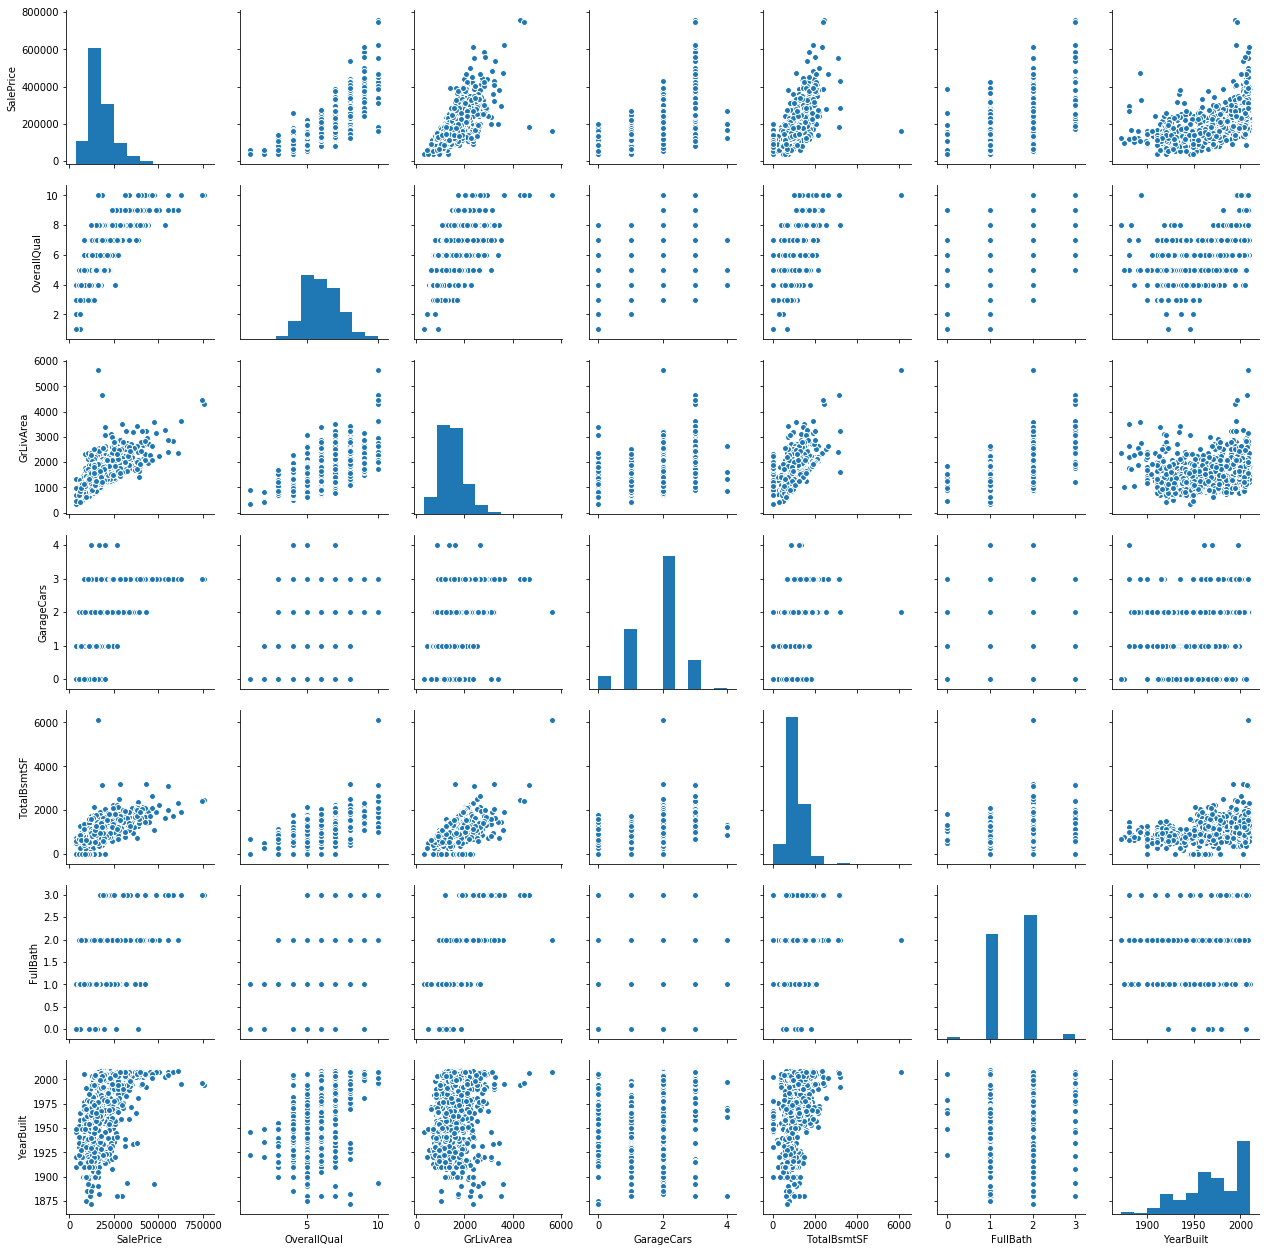

In [12]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])

In [13]:
missing_data=df_train.isnull().sum()/df_train.isnull().count()
missing_data.sort_values(ascending=False)
cols_to_delete=[]
for x in df_train.columns:
    if missing_data[x]>0:
        cols_to_delete.append(x)
cols_to_delete.remove("Electrical")
df_train=df_train.drop(cols_to_delete,axis=1)


        
        



    

In [14]:
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [15]:
saleprice_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
saleprice_scaled.sort()
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
high_range, low_range

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(array([[ 3.82758058],
        [ 4.0395221 ],
        [ 4.49473628],
        [ 4.70872962],
        [ 4.728631  ],
        [ 5.06034585],
        [ 5.42191907],
        [ 5.58987866],
        [ 7.10041987],
        [ 7.22629831]]), array([[-1.83820775],
        [-1.83303414],
        [-1.80044422],
        [-1.78282123],
        [-1.77400974],
        [-1.62295562],
        [-1.6166617 ],
        [-1.58519209],
        [-1.58519209],
        [-1.57269236]]))

In [16]:
df_train=df_train.sort_values(by="GrLivArea",ascending=False)
df_train=df_train.drop(df_train[df_train["Id"]==1299].index)
df_train=df_train.drop(df_train[df_train["Id"]==524].index)





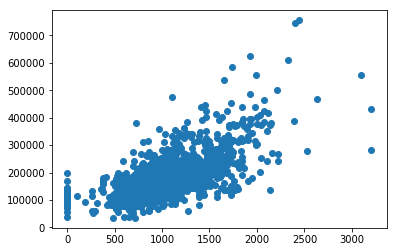

In [17]:
plt.scatter(df_train["TotalBsmtSF"],df_train["SalePrice"])

In [18]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')